In [5]:
# Identification
# assign the following string values
yourNameSurname='Rocco Pisciuneri' # e.g.,  yourNameSurname='Mario Rossi'
yourMatricolaNumber='1962772' # e.g.,  yourMatricolaNumber='12345678'
yourStudentEMAIL='pisciuneri.1962772@studenti.uniroma1.it' # e.g.,  yourStudentEMAIL='rossim.12345678@studenti.uniroma1.it'

# Machine Learning 2020/2021 - Challenge 

#### 1. Mandatory Rules
#### 2. The Dataset
- #### 2.1 Load the dataset
- #### 2.2 Dataset Analysis

#### 3. Classification
- #### 3.1 Preprocessing
- #### 3.2 Model Selection
- #### 3.3 Evaluation

#### 4. Summary


<hr>

## 1. Mandatory Rules (read carefully):
- This year the results of the challenges will count 8/30 of your final score.
- Only one submission is allowed. We will not consider multiple submissions.
- Please remember your solution must be <b>"YOUR SOLUTION"</b>, hence you are requested to deliver your individual answers/arguments/opinions/critics.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it <b>10 days before the date of a written exam (NO EXCEPTIONS)</b> if you miss to deliver your solution you must wait the next (if any) available deadline. 
- The subject of your email must be: "[Challenge_solution] NAME - SURNAME - MATRICOLA".
- Double check the subject of your email and the attachments.
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b> (NO RAR,7Z etc..).
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>.
- Your solution might be considered as the "copy" of others solutions, in that specific case the resulting score for all involved students will be 0/8.
- Then read carefully all the part of the jupyter notebook and fill all fields.
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b>.  
- If you have questions <b>Don't write "personal" emails</b> to Stefano Faralli, instead <b>use our google group</b>.
- A solution having a summary discussion with less than 500 words is evaluated with 0 points.

<hr>

## 2. The Dataset (up to 1/8 points)
<img width='400' src='videogames.jpg'/>

- The topic of the challenge is "Video games";
- The dataset consists of one single csv file ("video_games.csv");
- The full description of the dataset is available at: <a href='https://corgis-edu.github.io//corgis/csv/video_games/'>github project page</a>;

[1] Cox, Joe. “What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics 35.3 (2014): 189-198

## 2.1 Load the Dataset (up to 0.2/8 points)
In the following two cells: a code cell and, a markdown cell, where: 
- you write the code to create a pandas DataFrame by loading the "video_games.csv" file.  
- you describe the problems and the solution for loading the same csv file to a numpy datastructure.

In [6]:
# Here we import all the necessary libreries and function that will be used
import pandas as pd
import numpy as np
# The next import is necessary to do the pre-processing phase
from sklearn import preprocessing
# We import the simple imputer algorithm
from sklearn.impute import SimpleImputer
# We import the function SMOTENC to use the SMOTE technique also with categorical features
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
from matplotlib import pyplot
# We import the function train_test_split that splits the pandas dataframe in 2 parts
from sklearn.model_selection import train_test_split
# We import the functions necessary for the hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# We import the functions that is used to instaciate a particular model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# We import the functions necessary to show the results of our models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# We import the function to do the cross-validation
from sklearn.model_selection import cross_val_score

In [7]:
video_games = pd.read_csv('video_games.csv')
#This code is used to load the cvs file, after 'video_games.csv' we can also add the keyword "names" followed from
#a list of String in order tu rename the featers in the CSV file. If we do not rename the featers we will see the 
#name of the featers defined in the CSV file.

video_games.head()
#Line 6 just print the "head" (i.e. the first 5 rows) of the pandas DataFrame defined in the above lines)

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


Loading the same CSV file to a numpy datastructure collide in two main problems:

1) The first one is that a CSV file is a "Comma-separated values" file, and so if we use the code 'genfromtxt(delimiter=',')', if the data are not well formatted in the cells, (e.g. a cell contain a String with comma(s)) we will get an error like <i>"Line #num (got x columns instead of y)"</i> where <i>num</i> is an integer and x > y. In the following lines we are going to show the error that we obtain.

In [8]:
#We use the code genfromtxt to load the CSV file in the variable videoG, we use the keyword "delimiter" in order
#to define when a cell start and finish
#videoG = np.genfromtxt('video_games.csv', delimiter=',')
#The error that we will see is the following

To avoid this problem in the code we can add the following keyword <i>"usecols"</i> followed by the value <i>"np.arange(0,36)"</i>, but the problem is that we have to know in advance the number of features present in the CSV file, but also that we will see only a list of list that contain only a <i>Not a Number</i> value. In the above lines, we are going to show what we said in the previous lines.

In [9]:
#We add usecols=np.arange(0,36) where 36 represent the number of features in the Dataset
#videoG = np.genfromtxt('video_games.csv', delimiter=',',usecols=np.arange(0,36))
#print(videoG)

We can so now explain the second problem:
2) Even if the data are well-formatted (i.e. no comma(s) in one cell), another problem is that if the features are not all of the same types, we will see the problem showed before. A solution to avoid this is just to add the keyword <i>"dtype"</i> followed by the value <i>"None"</i> that convert all types into String type. Moreover, one other problem (the third one) is that in this way (without adding anything) we will also see the first line of the CSV file that contains the name of the features that we have. To avoid this is enough to add <i>skip_header=1</i>.

In [10]:
#We add dtype=None as we said, encoding=None used to do not show any warnings, skip_header=1 used to "skip"
#the first row because it only contain the name of the features
#videoG = np.genfromtxt('video_games.csv', delimiter=',',usecols=np.arange(0,36), dtype=None, encoding=None, skip_header=1)
#print(videoG)

## 2.2 Dataset Analysis (up to 0.8/8 points)
In the following code cell (feel free to create new cells), remember to comment your code snippets:

1) Print the total number of samples;

2) Print a table with the first 15 samples;

3) Plot the histogram distribution of "Features.Handheld?";

4) Plot the histogram distribution of "Features.Online?";

5) Plot the histogram distribution of "Metadata.Publishers";	

6) Perform feature importance analysis; 

## Answers

1) Print the total number of samples;

In [11]:
#This first code shows the "shape" of the CSV file (i.e. the shape of the samples)
video_games.shape

(1212, 36)

With the above method, we can see not only the total number of samples, identified by the first number (1212) but also the number of features that we have in the DataSet. (Number of features is also the number of columns in the CVS file)

In [12]:
#This second code just show the lenght of the Pandas DataFrame
len(video_games.index)

1212

2) Print a table with the first 15 samples;

There are different ways to answer this question. 
In the following cell, we are going to show the easy way, but there are other methods that we can use, like:
1) <i>video_games.loc[:15]</i> that select the rows where we are interested to "by label";
2) <i>video_games.iloc[:15,a:b]</i> that select the rows where we are interested in "by position" and also allow us to select a range of features that we want to show. 'a' and 'b' represent, respectively, the start and the finish column (feature) that we want to show.

The difference with the respect to the first method is that in this method we only print the length of the pandas DataFrame and not also the number of features present in the DataSet.

In [13]:
#This is the easy way, just take the samples from the first one to the 15th
video_games[:15]

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
5,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,...,20.833333,25.200000,20.000000,3,16.450000,15.500000,15.750000,15.500000,2,15.250000
6,Ridge Racer,True,1,True,True,Racing / Driving,True,Namco,True,88,...,0.883333,0.933333,0.883333,2,0.833333,0.616667,0.783333,0.533333,3,0.450000
7,Metal Gear Ac!d,True,1,True,True,Strategy,True,Konami,True,75,...,24.833333,27.483333,25.100000,6,21.916667,20.700000,23.600000,20.783333,11,17.883333
8,Madden NFL 2005,True,1,True,True,Sports,True,EA,True,68,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
9,Pokmon Dash,True,1,True,True,Racing / Driving,True,Nintendo,True,46,...,0.000000,0.000000,0.000000,0,0.000000,1.116667,1.200000,1.083333,3,1.050000


3) Plot the histogram distribution of "Features.Handheld?";

4) Plot the histogram distribution of "Features.Online?";

5) Plot the histogram distribution of "Metadata.Publishers"; 

We are going to answer to this three question togher, in fact the code used is the same, the only things that change is the feature that we want to plot. We are going to use the following code <i>video_games['Feature_Name'].value_counts().plot(kind='bar', title='Title')</i> where:
- <i>video_games['Feature_Name']</i> is used to select the feater where we are interested to;
- <i>.value_counts()</i> is used to count, for each value of a specific feature, the number of occurrences of the value;
- <i>plot(kind='bar', title='Title')</i> is used to plot the distribution of the feature, <i>kind='bar'</i> is added because we want a "histogram" distribution, and finally <i>title='Title'</i> just add a title to the plot.

<AxesSubplot:title={'center':'Feature: Handheld'}>

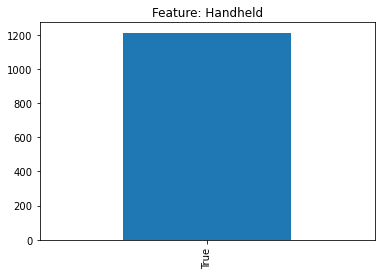

In [14]:
#We first plot the feater "Features.Handheld?", that have a boolean type
video_games['Features.Handheld?'].value_counts().plot(kind='bar', title='Feature: Handheld')

<AxesSubplot:title={'center':'Feature: Online'}>

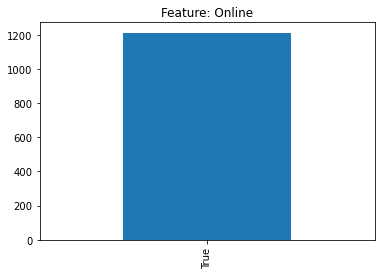

In [15]:
#We plot the feater "Features.Online?", and also this have a boolean type
video_games['Features.Online?'].value_counts().plot(kind='bar', title='Feature: Online')

<AxesSubplot:title={'center':'Publishers'}>

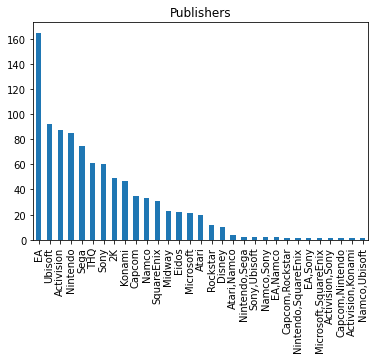

In [16]:
#We plot the feater "Metadata.Publishers", that have a String value
video_games['Metadata.Publishers'].value_counts().plot(kind='bar', title='Publishers')

6) Perform feature importance analysis;

The answer to this question is provided in section 3.3)Evaluation.

<hr>

## 3. Classification (up to 7/8 points)
In this part of the tutorial you are requested to perform all the necessary steps required in order to design a full fledged classification task on the <b>Metrics.Review Score</b>.

You are requested to perform the following steps having in mind the following: 

1) the dataset must be properly splitted to perform crossvalidation during model selection/hyper parameter tuning and to test during the evaluation step 

2) features must be properly encoded

3) the target feature can be dicretized <b>(number of classes must be greater than 5)</b> in order to simplify the problem;

4) for model selection you are requested to consider: 
    - Decision Trees
    - Support Vector Machines;
    - An ensamble methodology;
    - MLPNs.
5) during model selection hyper-parameter tuning must be performed and discussed;

6) class imbalancing must be addressed (when appropriate);

7) remember to apply standardizion and normalization when appropriate;

8) provide a discussion of model selection where you describe the differences in terms of performance and explains the root causes;

9) describe the measure adopted for the evaluation and discuss the results;

#### 3.1 Preprocessing (up to 2/8 points)
Write the necessary code to perfrom an adequate prepocessing, <b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

The pre-processing phase is fundamental in Machine Learning, in fact, rarely data are ready to use, they can contain typos, they can have missing values and also data could be not normalized. We need so to do some pre-processing work, to "clean" and normalize data. The first thing that we do is handle the missing values; there is a different way to handle this:
- We can simply discard the entire rows end/or columns that contain the missing value. The problem with this approach is that we can discard useful sample(s);
- We can impute the missing value. This approach is better than the first one because we try to "predict" the possible value of the missing data. There are different algorithms, like univariate and multivariate feature imputation and finally KNN imputation.

In [17]:
#We know that the total samples are"Index: ",  1212, and so we print all the feature(s) that have a total number of value
#less then 1212 (i.e. that have at least one missing value)
for el in video_games:
    tot = video_games[el].count()
    if tot < 1212:
        print("Feature with missing value(s):",el+";" , "Number of not missing value: ", tot)

Feature with missing value(s): Metadata.Publishers; Number of not missing value:  948


We have just one feature with a missing value, that is <i>Metadata.Publishers</i>, in particular, we have 264 missing values. In general when the missing values are <= 10% of the total number of samples, then the samples containing the missing value are discarded, instead, if the missing values are >= 50% of the total number of samples, then the all feater with the missing values is discarded. In this case, the missing values are around 22% of the total number of samples, so we are going to impute those missing values. <i>Metadata.Publishers</i> is a categorical feature and so we can use a simple imputer with <i>strategy="most_frequent"</i> in order to impute the missing value.

In [18]:
imp = SimpleImputer(strategy="most_frequent")
#we define the strategy that we want to use

#Metadata.Publishers feature at row 11 have a missing value
print("Metadata.Publishers feature at row 11 have a missing value")
print("Before imputation --- Metadata.Publishers value at row 11: ", video_games['Metadata.Publishers'][10])

#We show the value before and after the imputation
video_games[:] = imp.fit_transform(video_games)

print("After imputation --- Metadata.Publishers value at row 11: ", video_games['Metadata.Publishers'][10])

Metadata.Publishers feature at row 11 have a missing value
Before imputation --- Metadata.Publishers value at row 11:  nan
After imputation --- Metadata.Publishers value at row 11:  EA


Our data is now without missing value, we can so now continue the pre-processing phase. We discretize the class to predict, the feature <i>Metrics.Review Score</i>, to simplify the problem. I decided to discretize the class to predict in 6 bins and so <i>Metrics.Review Score</i> can now have value in range from 1 to 6.
In the following, we show the code to compute this operation.

In [19]:
#We isolate the class to predict
class_to_predict = video_games['Metrics.Review Score']

# I didn't used the kBinsDiscretizer beacuse it creates different bins (in this case 6) that do not follow a numeric
# order, that instead I think it is an important thing. In particular I tried both approaches and I notice
# that have the output classes dived into consecutive ranges (that I implemented with the pandas cut function)
# leads to much better performance with the respect of using the kBinsDiscretizer function
video_games['Metrics.Review Score'] = pd.cut(class_to_predict, 6, labels=["1", "2", "3", "4", "5", "6"]) 

#with .head() we can see the first 5 rows of the dataset 
video_games.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,6,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,6,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,5,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,5,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,4,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


As we can see, the value of the class, <i>Metrics.Review Score</i>, have values between 1 and 6.

We continue with our preprocessing work and we do the class balancement. This operation is really important because many algorithms suffer if the classes are not balanced, if we have two classes, call it class A and class B if class A represents 90% of the dataset an algorithm can completely ignore the minority class (class B). In the next subsection we will use the Decision Tree and SVM classifier and if data are not balanced the performance evaluation won't be the best ones.
So we have to balance the class to avoid this problem and we can do it with:
- Down-sample the majority class, but this solution can discard useful sample of the dataset;
- Up-sample the minority class, but this can cause overfitting and obtain a non-general model;
- SMOTE (Synthetic Minority Oversampling TEchnique), that creates new instances of the minority class by forming a convex combination of the neighboring instances.

In [20]:
#For each different value in the class to predict (there are 6 different values), we print the total number
#of occurences of that value
video_games['Metrics.Review Score'].value_counts()

5    442
4    401
3    192
6    118
2     51
1      8
Name: Metrics.Review Score, dtype: int64

As we can see, in this case, the value 5 has a major number of samples, instead, the value 1 has a minor number of samples. We are going to call so the samples with a class value equal to 5 the majority class, and all the other samples with different class values as the minority classes (and so we have five minority classes and one majority class). To balance the classes we apply the SMOTE technique. We are going to show now the code to compute it.

In [21]:
#We use a copy od the original dataframe and we define as X the dataframe that do not contain the target class
video_games_upsampled = video_games.copy()
X = video_games_upsampled.loc[:, video_games.columns != 'Metrics.Review Score']

#We select only the categorical features and we define the indexes of that features
categorical_c = X.select_dtypes(exclude=[np.number])
indexes_of_categorical_c = [X.columns.get_loc(c) for c in categorical_c.columns]

#We define as y the dataframe that contain only the target class
y = video_games_upsampled['Metrics.Review Score']

#We apply now the SMOTE technique
smote_enc = SMOTENC(categorical_features=indexes_of_categorical_c, random_state=0, 
                 sampling_strategy='auto', k_neighbors=5)
X_res, y_res = smote_enc.fit_resample(X, y)

#We unify now X resampled and y resemled
video_games_upsampled = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

#We now show how many instaces we have for each classes
video_games_upsampled['Metrics.Review Score'].value_counts()


1    442
2    442
3    442
4    442
5    442
6    442
Name: Metrics.Review Score, dtype: int64

As we can see, classes are now balanced!

As part of the pre-processing phase, we can scale and normalize the dataset. Many algorithms in Machine Learning obtain better performance evaluation if data have a normal (Gaussian) distribution and data are normalized. One of these is the Multi Layer Perceptron Networks, a model that we will select in the next section; also SVM needs normalized data, even if it is scaling invariant. So is important to normalize and scale data to obtain a better performance evaluation. We will use also the normalized and scaled data for the other selected models, this operation on the data does not impact other models' performance evaluation.
<ol>
    <li>
        Scaling:</br>
        There is differnt way to scale data, like:
        <ul>
            <li>Standard scaling</li>
            <li>Min/Max scaling</li>
            <li>Max Abs scaling</li>
            <li>Mapping to a Uniform distribution</li>
            <li>Mapping to a Gaussian distribution</li>
        </ul>
    </li>
    <li>
        Normalization:
        The process of normalization is used to have unit norm. Function <i>normalize</i> in sklearn provides a quick and easy way to perform this operation; normalize function allow us to do:
        <ul>
            <li><i>l1 norm</i></li>
            <li><i>l2 norm</i></li>
        </ul>
    </li>
</ol>

We decided to map our numerical features into a Gaussian distribution and to normalize them with <i>l2 norm</i>.

In the following cell, we show the code to scale numerical features into a Gaussian distribution.

Histogram of feature Metrics.Used Price before the scaling


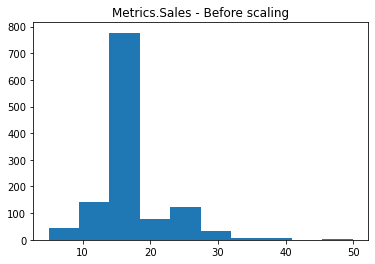

-----------------------------------------------------------
Histogram of feature Metrics.Used Price after the scaling


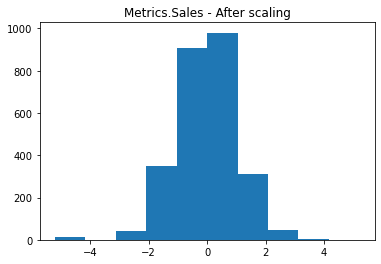

In [22]:
#We make a copy of the original pandas DataFrame
video_games_scaled = video_games_upsampled.copy()

quantile_transformer = preprocessing.QuantileTransformer(random_state=0,n_quantiles=112, output_distribution='normal')

#The following lines are used to scale only numerical features, in fact we can't scale categorical features
#Moreover we do not scale the class to be predicted "Metrics.Review Score"
for el in video_games_scaled.columns:
    if (video_games_scaled[el].dtype == 'int64' or video_games_scaled[el].dtype == 'float64') and el != 'Metrics.Review Score':
        #We can't pass a 1D array to quantile_transformer.fit_transform() and so we have to reshape with the
        #following easy way
        reshape = video_games_scaled[el].values.reshape(-1,1)
        video_games_scaled[el] = quantile_transformer.fit_transform(reshape)

#We show how was the distribution before the scaling process
print("Histogram of feature Metrics.Used Price before the scaling")
plt.hist(video_games['Metrics.Used Price'])
plt.title('Metrics.Sales - Before scaling')
plt.show()

print("-----------------------------------------------------------")

#We show how is the distribution after the scaling process
print("Histogram of feature Metrics.Used Price after the scaling")
plt.hist(video_games_scaled['Metrics.Used Price'])
plt.title('Metrics.Sales - After scaling')
plt.show()

In the following cell we show the code to normalize numerical features by<i>l2 norm</i>.

In [23]:
#we make a copy of the scaled pandas dataframe
video_games_norm = video_games_scaled.copy()

#The following lines are used to normalize only numerical features, in fact we can't normalize categorical features
#Moreover we do not normalize the class to be predicted "Metrics.Review Score"
for el in video_games_norm.columns:
    if (video_games_norm[el].dtype == 'int64' or video_games_norm[el].dtype == 'float64') and el != 'Metrics.Review Score':
        #We can't pass a 1D array to the function normalize() and so we have to reshape with the following easy way
        reshape = video_games_norm[el].values.reshape(-1,1)
        reshape = preprocessing.normalize([video_games_norm[el]], norm='l2')
        video_games_norm[el] = reshape[0] 

#We show the first three values of a feature before the normalization
print("First three values of feature Features.Max Players after the scaling but before the normalization")
print(video_games_scaled['Features.Max Players'].head(3))

print("------------------------------------------------")

#We show the first three values of a feature after the normalization
print("First three values of feature Features.Max Players after the scaling and after the normalization")
print(video_games_norm['Features.Max Players'].head(3))

First three values of feature Features.Max Players after the scaling but before the normalization
0   -5.199338
1   -5.199338
2    0.864365
Name: Features.Max Players, dtype: float64
------------------------------------------------
First three values of feature Features.Max Players after the scaling and after the normalization
0   -0.022216
1   -0.022216
2    0.003693
Name: Features.Max Players, dtype: float64


Our preprocessing phase is now terminated, our dataset does not have missing values, the target class is now discretized and the classes are balanced. Finally, our data (except the target class) are normalized and scaled. We are ready so to start the next step: <b>Model Selection</b>. 


<b>IMPORTANT:</b> the preprocessing phase also includes encoding but for the reason of simplicity I decided to do it after the splitting of the dataset.

#### 3.2 Model Selection  (up to 3/8 points)
Write the necessary code to perfrom an adequate model selection. tips: for some models you may need to perform additional preprocessing steps (encoding, normalization, feature selection, class balancement, ...).
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

In this section, we are going to experiment different models to predict the target class. We are going to use Decision Tree Classifier, Support Vector Machines Classifier (SVM), an Ensamble Method: Random Forest, and Multi Layer Perceptron Networks (MLPNs).

In [24]:
#We make 2 copy, one of the normalized, scaled and class balanced data and one of the original one in orther
#to compare the results after
video_games_MS = video_games_norm.copy()
video_games_Worst = video_games.copy()

#We define the class to predict, y, and all the other features, X.
y_MS = video_games_MS['Metrics.Review Score']
X_MS = video_games_MS.drop('Metrics.Review Score',1)

y_Worst = video_games_Worst['Metrics.Review Score']
X_Worst = video_games_Worst.drop('Metrics.Review Score',1)


# Before I split the dataset into training and test set I encode the categorical features, in particular,
# I decided to use the get_dummies function, since it encodes ONLY categorical features and not also the
# numerical ones, moreover, I decide to use it since it is faster then the OneHot function seen during the course
# Note that it is not necessary to encode the target feature!!!
features = X_MS.columns[:-1]
X_MS_enc = pd.get_dummies(X_MS[features])
X_Worst_enc = pd.get_dummies(X_Worst[features])

# We use the function that splits the pandas dataframe, y_train and y_test contain the ground 
# truth respectively for X_train and X_test
X_train_MS, X_test_MS, y_train_MS, y_test_MS = train_test_split(X_MS_enc, y_MS, test_size=0.2, random_state = 112)

X_train_Worst, X_test_Worst, y_train_Worst, y_test_Worst = train_test_split(X_Worst_enc, y_Worst,
                                                                            test_size=0.2, random_state = 112)

/tmp/ipykernel_4129/1548294783.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_MS = video_games_MS.drop('Metrics.Review Score',1)
/tmp/ipykernel_4129/1548294783.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_Worst = video_games_Worst.drop('Metrics.Review Score',1)


Our dataset is now split the two parts, the training set, and the test set, where the training set contains 80% of samples of the dataset normalized, scaled, and with class balanced, and the test set contains the remaining 20%. We are going to learn a model on the training set and then, do the prediction on the test set. We will see the results of the prediction phase in the model evaluation section where we evaluate these results. Moreover, in that section, we will show the difference with the prediction done on data not scaled, normalized, and without balanced class.

Data are also now encoded and then we can use algorithms like Decision Tree Classifier, SVM classifier, and Random Forest that can't handle categorical features. Moreover, if the classes to predict are not balanced this can impact the performance evaluation of some learned model (e.g. Decision Tree, SVM, and Random Forest), but we have already balanced our classes and then this problem won't occur. Finally, we are going to use scaled and normalized data, if we do not scale and normalize the data this can impact the performance evaluation of a Multi Layer Perceptron Networks Classifier. Note that even if we use scaled and normalized data in other models where this is not required, the performance evaluation won't be worst. I decided so to do the split on data with balanced classes and with data scaled and normalized.

For each selected model we also do hyperparameter tuning to define the best parameter for each model. The grid search was provided by GridSearchCV that exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter and also was used the <i>RandomizedSearchCV</i> function that implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values.

### Decision Tree Classifier
Decision Tree is a supervised machine learning algorithm that creates a tree with three important components:
- Test node: that is a test on a specific feature;
- Leaf node: that represents a decision (classification);
- Enge: That can link two test nodes or one test node to a leaf node.
A decision tree can be re-written as a set of rules and the "function" to minimize is the depth of the tree, but this is an NP-Hard problem and so a Greedy technique is even good. One possibility is to define "the order" of testing the different features, based for example on the information gain that is based on the entropy that represents the "disorder" of the set (of instances) that we are using.


We are going now to show the necessary code to run a Decision Tree Classifier. We also show the code to find the best parameter for this model.

As we said in the previous lines classes are already balanced and categorical features are encoded into numerical ones. 

In [25]:
#We define the parameter to tune, in particular we are making tuning on the criterion, on the minimum number
#of samples for a split and the minimum number of sampled in a leaf
parameter_DTC = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 10),
    'max_depth': [int(x) for x in range(10, 100, 10)]}


#Now we use the function GridSearchCV in order to find the best parameter from the ones that we want to tune
clf_MS = GridSearchCV(tree.DecisionTreeClassifier(), parameter_DTC, n_jobs = -1) 
#n_jobs = -1 allow the parallelization

#Now we stat to learn the model
clf_MS.fit(X_train_MS, y_train_MS) 
    
#We now show the best parameter for processed data
best_params_DTC_MS = clf_MS.best_params_

print("Best parameters for scaled, normalized and class balanced data:", best_params_DTC_MS)

print("-----------------------------------------------")

#We now show the best parameter for not processed data
clf_Worst = GridSearchCV(tree.DecisionTreeClassifier(), parameter_DTC, n_jobs = -1) 
clf_Worst.fit(X_train_Worst, y_train_Worst)
best_params_DTC_Worst = clf_Worst.best_params_

print("Best parameters for original data:", best_params_DTC_Worst)


/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/model_selec

Best parameters for scaled, normalized and class balanced data: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 3}
-----------------------------------------------


/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/model_selec

Best parameters for original data: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8}


/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.4592009  0.4561188  ... 0.41071524 0.41072592 0.41382405]
  warnings.warn(


Only for Decision Tree, we fit another model, to answer a previous question regarding the feature importance. (We will show the results in the evaluation section)

In [26]:
#We learn a model only on the processed data
clf_FI = tree.DecisionTreeClassifier()
clf_FI.fit(X_train_MS, y_train_MS)

DecisionTreeClassifier()

We have done hyperparameter tuning on the <i>criterion</i>, on <i>the minimum number of samples for a split</i> and on <i>the minimum number of samples in a leaf</i> and then we show what are the best parameter values that maximize the performance of the model. So in the prediction phase, we are going to use these parameters, to obtain the maximum score.

### Support Vector Machines Classifier

SVM is a supervised machine learning algorithm and it aims to find a hyperplane that well separates instances, to categorize future instances. In particular, it finds the best separating line that maximizes at best the margin. Have a small margin means that we can fall into the problem of overfitting, instead have a large margin means that we have a more general model but also that can we do more misclassification.

As for the Decision Tree Classifier, we show the necessary code to train a model and to obtain the best parameter for this model, and also classes are already balanced. Most of the code is similar to the previous ones and so we shortly comment on the code.

One important thing done for the SVM classifier is to remove categorical features, since SVM is a distance based model and categorical feature do not "help" to much to defines the "closeness" of two instances, in particular, the fact is that in some how is impossible to define some notion of distance between two categorical values.

Classes are also already balanced and since we remove categorical features we do not need to encode nothing.

In [27]:
%%time

# We use a copy of the original splitted data
X_num_MS = X_MS.copy()
X_num_Worst = X_Worst.copy()

# As said before we remove all the categorical features in order to use only numerical features that allow us to
# compute a distance ("in the right way") between two data points
for feature in X_num_MS.columns:
    if X_num_MS[feature].dtype != 'int64' and X_num_MS[feature].dtype != 'float64':
        X_num_MS = X_num_MS.drop(feature, 1)
        X_num_Worst = X_num_Worst.drop(feature, 1)
        
X_train_SVM_MS, X_test_SVM_MS, y_train_SVM_MS, y_test_SVM_MS = train_test_split(X_num_MS, y_MS,
                                                                                test_size=0.2, random_state = 112)

X_train_SVM_Worst, X_test_SVM_Worst, y_train_SVM_Worst, y_test_SVM_Worst = train_test_split(X_num_Worst, y_Worst,
                                                                            test_size=0.2, random_state = 112)


#We want to do hyper parameter tuning on kernel, gamma value and C value
parameters_SVM = {
    'kernel': ['rbf', 'linear'],
    'gamma': [1e-3, 1e-4],
    'C': [1, 10, 100, 1000]}


#We start our Grid Search
svc_MS = GridSearchCV(svm.SVC(), parameters_SVM, n_jobs=-1)
svc_MS.fit(X_train_SVM_MS, y_train_SVM_MS)  

#We now show the best parameter for processed data
best_params_SVC_MS = svc_MS.best_params_
print("Best parameters for scaled, normalized and class balanced data:", best_params_SVC_MS)


<timed exec>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<timed exec>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Best parameters for scaled, normalized and class balanced data: {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}
CPU times: user 743 ms, sys: 30.6 ms, total: 773 ms
Wall time: 8.19 s


In [28]:
%%time

#We now show the best parameter for not processed data
svc_Worst = GridSearchCV(svm.SVC(), parameters_SVM, n_jobs=-1)
svc_Worst.fit(X_train_SVM_Worst, y_train_SVM_Worst)  
best_params_SVC_Worst = svc_Worst.best_params_
print("Best parameters for original data:", best_params_SVC_Worst)


Best parameters for original data: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
CPU times: user 319 ms, sys: 18.9 ms, total: 338 ms
Wall time: 3min 58s


We now have the best parameter (from the ones that we selected) for SVM.

**Note:** I decided to print the time occurred to learn the two different model, to show how fast is SVM with processed data, we can see that it is MUCH faster by using not processed data!!!

### Ensamble method: Random Forest

The ensamble method is a supervised machine learning algorithm that is represented by a set of classifiers that learn a target function and combine the prediction of the single classifier to predict unseen instances. This algorithm reduces the variance and improves the generalization and the Random Forest algorithm is one of the techniques to manipulate the Data set. In particular, it uses a set of decision trees, learned with the random vector method, and then combines the prediction with one of the two voting methods.

In the following, we are going to show the necessary code to train a model and to obtain the best parameter for this model. Random forest made use of Decision Trees and so as for Decision Tree Classifier we need balanced classes and to encode categorical features into numerical ones, but this was already done before, and so we are ready to learn the model!

In [29]:
#We want to do hyper parameter tuning on the minimum number of samples for a split, on the minimum number 
#of sampled in a leaf and on the number of estimators
parameter_RF = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [int(x) for x in range(10, 100, 10)]}

#We start our Grid Search
rf_MS = GridSearchCV(RandomForestClassifier(), parameter_RF, n_jobs=-1)
rf_MS.fit(X_train_MS, y_train_MS) 

#We now show the best parameter for processed data
best_params_RF_MS = rf_MS.best_params_
print("Best parameters for scaled, normalized and class balanced data:", best_params_RF_MS)

print("-----------------------------------------------")

#We now show the best parameter for not processed data
rf_Worst = GridSearchCV(RandomForestClassifier(), parameter_RF, n_jobs=-1)
rf_Worst.fit(X_train_Worst, y_train_Worst)
best_params_RF_Worst = rf_MS.best_params_
print("Best parameters for original data:", best_params_RF_Worst)

Best parameters for scaled, normalized and class balanced data: {'max_depth': 90, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
-----------------------------------------------
Best parameters for original data: {'max_depth': 90, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


We now have the best parameter (from the ones that we selected) for Random Forest Classifier.

### Multi Layer Perceptron Networks Classifier

MLPNs is a supervised machine learning algorithm and it made use of perceptrons. The structure of MLPNs is composed of input, hidden and output layers fully connected one to the other with a feed-forward activation function. It made use of a Convolutional function to "active" or not one node (perceptron). In MLPNs we want that our outputs are closer as possible to the right one, and so we have to iteratively adjust the weights of each edge.

In the following, we are going to show the necessary code to train a model and to obtain the best parameter for this model. Multi Layer Perceptron Networks Classifier need data scaled and normalized but as we said at the beginning of the section we decided to use scaled and normalized data and so we are ready to train our model.

In [30]:
#We want to do hyper parameter tuning on size of the hidden layers, on the alpha value and on the solver
parameter_MLP = {
    'hidden_layer_sizes' : [[12,8], [15,10], [20,15]],
    'alpha' : [1e-4, 1e-5, 1e-6],
    'solver' : ['lbfgs', 'sgd', 'adam']}

#We start our Randomized Search
mlpn_MS = RandomizedSearchCV(MLPClassifier(), parameter_MLP, n_jobs=-1)
mlpn_MS.fit(X_train_MS, y_train_MS)

#We now show the best parameter for processed data
best_params_MLP_MS = mlpn_MS.best_params_
print("Best parameters for scaled, normalized and class balanced data:", best_params_MLP_MS)

print("-----------------------------------------------")

#We now show the best parameter for not processed data
mlpn_Worst = RandomizedSearchCV(MLPClassifier(), parameter_MLP, n_jobs=-1)
mlpn_Worst.fit(X_train_Worst, y_train_Worst)

#We print the best parameter value
best_params_MLP_Worst = mlpn_Worst.best_params_
print("Best parameters original data:", best_params_MLP_Worst)

/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/Scaricati/ENTER/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/Sca

KeyboardInterrupt: 

We now have the best parameter (from the ones that we selected) for MLPNs.

#### 3.3 Evaluation (up to 2/8 points)
Write the necessary code to perform an adequate model evaluation of the selected model. Confusion matrix and classsification reports are welcome. 
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and no discussion correpsonds to 0 POINTS</b>

In this section for each model selected we first show the confusion matrix and the classification report obtained from the previous model learned and then with the function <i>cross_val_score</i> we split the data, fit a model and compute the score (we evaluate the model on the accuracy) 5 consecutive times and then we output the mean of all the scores obtained +/- the standard deviation. In this way, we reduce the probability to be "lucky" or "unlucky" by splitting the dataset into training and test set, and also by adding "+/- the standard deviation" we define the Confidence interval of our accuracy. Moreover, we will also compare the results obtained from not processed data and processed ones.

As for the previous section we will use data with balanced classes and data scaled and normalized and in the next cells, we will encode the categorical features into numerical ones.

We now answer a previous question "6) Perform feature importance analysis;" and we will show the feature performance analysis obtained from the Decision Tree Model.

In [ ]:
# We store our importances in a list
importance = clf_FI.feature_importances_

# We define the list of number 
number_list = [number for number in range(len(importance))]

# We plot the feature importance obtained
pyplot.bar(number_list, importance)

### Decision Tree Classifier

We are now going to show the confusion matrix and the classification report on the prediction done on the test set <i>test_enc</i> after the model trained in the previous section. Notice that the best parameter obtained is already set.

In [ ]:
#We define a list of target names to assigne to each classes that we will use in the line 15 
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']

#We predict the class for each samples in the test set
predictedDTC_MS = clf_MS.predict(X_test_MS)
#We print the confusion matrix and the classification Report for processed data
print("PROCESSED DATA:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test_MS, predictedDTC_MS))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_MS, predictedDTC_MS, target_names = target_names))

print("-----------------------------------------------")
print("NOT PROCESSED DATA:")

predictedDTC_Worst = clf_Worst.predict(X_test_Worst)
#We print the confusion matrix and the classification Report for not processed data
print("Confusion Matrix: ")
print(confusion_matrix(y_test_Worst, predictedDTC_Worst))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_Worst, predictedDTC_Worst, target_names = target_names))

As we can see the performances that we obtain from processed data are better than the performances that we obtain from the not processed data. In general, we can see that for class 1 in the processed data we obtain a higher precision and an f1-score that represents a trade-off between precision and recall. As we can see the accuracy obtained from processed data (67%)  is much higher than the one obtained from not-processed data (48%).

We now show the necessary code to perform cross-validation on the dataset. In particular, we are going to evaluate the accuracy that we obtain from each test set. I decided to do the cross-validation on the processed data because as we can see they have better performances than the not processed ones. Classes are so already balanced and then we only need to encode categorical features. We are going to use also the best parameter tuned in the previous section.

In [ ]:
# We will use a cose of the original dataset
video_games_ME = video_games_norm.copy()

# We define the class to predict, y, and all the other features, X.
y_ME = video_games_ME['Metrics.Review Score']
X_ME = video_games_ME.drop('Metrics.Review Score',1)

# We encode the categorical features
X_enc = pd.get_dummies(X_ME[features])

# We set the best parameter to the Decision Tree Classifier
clfCV = tree.DecisionTreeClassifier(criterion = best_params_DTC_MS['criterion'],
                                    min_samples_leaf = best_params_DTC_MS['min_samples_leaf'],
                                    min_samples_split = best_params_DTC_MS['min_samples_split'],
                                    max_depth = best_params_DTC_MS['max_depth'])

# We do the cross validation and we store the scores into a list, if not specified the score that we will calculate
# is the accuracy
scores_DTC = cross_val_score(clfCV, X_enc, y_ME, cv=5, n_jobs=-1)

# We print the results that we obtain
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_DTC.mean(), scores_DTC.std() * 2))

As we can see the accuracy that we obtain is lower than the accuracy that we printed in the classification report, 0.67, but as we said the cross-validation operation is used to reduce the probability to be unlucky and lucky by splitting the dataset. We may have been lucky by splitting the dataset into training and test sets.

### Support Vector Machines Classifier

We are now going to show the confusion matrix and the classification report on the prediction done on the test set <i>X_test_num</i> after the model trained in the previous section. Most of the operations are similar and so the comment on the code will be short.

In [ ]:
#We do the prediction on X_test_num (DataSet that contain only numerical features)
predictedSVM_MS = svc_MS.predict(X_test_SVM_MS) 
#We print the confusion matrix and the classification Report for processed data
print("PROCESSED DATA:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test_SVM_MS, predictedSVM_MS))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_SVM_MS, predictedSVM_MS, target_names = target_names))

print("-----------------------------------------------")
print("NOT PROCESSED DATA:")

#We print the confusion matrix and the classification Report for not processed data
predictedSVM_Worst = svc_Worst.predict(X_test_SVM_Worst)
print("Confusion Matrix: ")
print(confusion_matrix(y_test_SVM_Worst, predictedSVM_Worst))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_SVM_Worst, predictedSVM_Worst, target_names = target_names))

As for DTC, we obtain better performance with precessed data, in particular here we obtain an accuracy of the 52% that is quite lower than the accuracy obtained from DTC. Obviously, as for DTC, we will do the cross-validation step to reduce the probability of being lucky or unlucky by splitting our dataset.
We are going to use also the best parameter tuned in the previous section.

In [ ]:
# As before we remove the categorical features
X_num_ME = X_ME.copy()
for feature in X_num_ME.columns:
    if X_num_ME[feature].dtype != 'int64' and X_num_ME[feature].dtype != 'float64':
        X_num_ME = X_num_ME.drop(feature, 1)

# We set the best parameter for SVM
svcCV = svm.SVC(kernel = best_params_SVC_MS['kernel'], gamma = best_params_SVC_MS['gamma'],
                C = best_params_SVC_MS['C'])

#We apply the croos validation and store the results in a list
scores_SVC = cross_val_score(svcCV, X_num_ME, y_ME, cv=5, n_jobs=-1)

#We print the results that we obtain
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_SVC.mean(), scores_SVC.std() * 2))

As for Decision Tree the accuracy obtained is lower (now is 0.43 before it was 0.52).

### Random Forest

We are now going to show the confusion matrix and the classification report on the prediction done on the test set <i>test_enc</i> after the model trained in the previous section.

In [ ]:
#We predict the class for each samples in the test set
predictedRF_MS = rf_MS.predict(X_test_MS)
#We print the confusion matrix and the classification Report for processed data
print("PROCESSED DATA:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test_MS, predictedRF_MS))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_MS, predictedRF_MS, target_names=target_names))

print("-----------------------------------------------")
#We print the confusion matrix and the classification Report for not processed data
print("NOT PROCESSED DATA:")

predictedRF_Worst = rf_Worst.predict(X_test_Worst)
print("Confusion Matrix: ")
print(confusion_matrix(y_test_Worst, predictedRF_Worst))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_Worst, predictedRF_Worst, target_names=target_names))

As for the previous classifier, the accuracy that we got on processed data is around 79%, instead, the accuracy that we got for the not-processed data is 49%.

As before we now show the necessary code to perform cross-validation on the dataset. Classes are already balanced and categorical features are already encoded into numerical ones. We are going to use also the best parameter tuned in the previous section.

In [ ]:
#We set the best parameter for Random Forest
rfCV = RandomForestClassifier(n_estimators = best_params_RF_MS['n_estimators'], 
                                min_samples_leaf = best_params_RF_MS['min_samples_leaf'],
                                min_samples_split = best_params_RF_MS['min_samples_split'],
                                max_depth = best_params_RF_MS['max_depth'])

#We apply the croos validation and store the results in a list
scores_RF = cross_val_score(rfCV, X_enc, y_ME, cv=5, n_jobs=-1)

#We print the results that we obtain
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_RF.mean(), scores_RF.std() * 2))

We obtained a bit lower accuracy after the cross-validation, but that is higher than the ones obtained from DTC and SVMC.

### Multi Layer Perceptron Networks

We are now going to show the confusion matrix and the classification report on the prediction done on the test set <i>test_enc</i> after the model trained in the previous section.

In [ ]:
#We predict the class for each samples in the test set
predictedMLP_MS = mlpn_MS.predict(X_test_MS)
#We print the confusion matrix and the classification Report for processed data
print("PROCESSED DATA:")
print("Confusion Matrix: ")
print(confusion_matrix(y_test_MS, predictedMLP_MS))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_MS, predictedMLP_MS, target_names = target_names))

print("-----------------------------------------------")
#We print the confusion matrix and the classification Report for not processed data
print("NOT PROCESSED DATA:")

predictedMLP_Worst = mlpn_Worst.predict(X_test_Worst)
#We print the confusion matrix and the classification Report
print("Confusion Matrix: ")
print(confusion_matrix(y_test_Worst, predictedMLP_Worst))
print("------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test_Worst, predictedMLP_Worst, target_names = target_names))

For MLPNs we obtain an accuracy on processed data (77%) that is much higher than the accuracy obtained from not-processed data (47%).

We now show the necessary code to perform cross-validation on the dataset. Classes are already scaled and normalized as we said at the begging of this section. We are going to use also the best parameter tuned in the previous section.

In [ ]:
#We set the best parameter for MLPNs
mlpnCV = MLPClassifier(solver = best_params_MLP_MS['solver'],
                    hidden_layer_sizes = best_params_MLP_MS['hidden_layer_sizes'],
                    alpha = best_params_MLP_MS['alpha'])

#We apply the croos validation and store the results in a list
scores_MLP = cross_val_score(mlpnCV, X_enc, y_ME, cv=5, n_jobs=-1)

#We print the results that we obtain
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_MLP.mean(), scores_MLP.std() * 2))

The accuracy obtained after the cross-validation is not so much lower than the accuracy obtained before, the difference is only in one point. Moreover, it is also the highest accuracy that we obtain.

In general, we can observe that on processed data class 1 is the "much better predicted",  it has high performances in terms of precision, recall, and f1-score, instead, with not-processed data, it is really hard to predict it, all the performances on class 1 is equal to 0. This so "helps" us to understand that scale and normalize data is fundamental, in order to obtain relevant improvement.

### 4. Summary
Provide a summary discussion of your solution <b>(at least 500 words)</b>.

<b>This is a mandatory step</b>

write here <b>your own</b> summary dicussion (use at least 500 words).

To have a more "fluid" comprehension of the steps done, I decided to structure the summary discussion into sections.

# Preliminary Steps
First of all, I started by doing some "preliminary" steps to "take confidence" in the dataset and the features present in it, in particular, I started by loading the ".CSV" file (our dataset) in a Pandas DataFrame and showing the main difference by loading the same CSV file in the Numpy datastructure. Next, the total number of samples in the dataset was printed, and also the first 15 samples of the dataset were printed, to show the "format" of each sample. Finally, the plot related to some features was showed, in particular, they were three, and two of those were a boolean feature, instead, the last one was related to a categorical feature.

# Classification
After the above steps, I started the real classification task by doing all the necessary steps to "clean" data, train different models, predict unseen samples, and then compare the results obtained from the various models with each other.
## Pre-Processing
I started by doing some pre-processing steps, this is an important phase since data rarely are "ready-to-use" and so some steps are fundamental to make the learning algorithms work as best as possible to achieve better performances. In particular, in this phase I started by analyzing the missing values present in the Dataset, and there was only one feature with missing values (<i>Metadata.Publishers</i>), then I noticed that the total number of missing values were around the 22% of the total number of the samples, and then I decided to handle that missing values with simple categorical imputer, since <i>Metadata.Publishers</i> is categorical, with a "most frequent" strategy.\
Next, I discretized the target feature (<i>Metrics.Review Score</i>) in 6 bins, to simplify the problem since the range of the target feature was between 0 and 100. In particular, I decided to divide the classes such that consecutive ranges of values belong to the same class. Then the next step done was the balancement of the classes, in particular, the classes weren't too much unbalanced but it is a necessary pre-processing step since some models, like Decision Tree, suffer if classes are unbalanced. The option that I decided to follow to handle the balancement of the classes was the SMOTE oversampling method, it is a better strategy with the respect to the downsampling and oversampling methods, since the first one may lead to discard useful samples and the second one may lead to overfitting. In particular, the SMOTE method creates new instances of the minority class by forming a convex combination of the neighboring samples.\
Once the classes were balanced I decide to normalize and scale the data, since some models, like SVM, are more efficient if data are scaled. Finally, to have a more understanding of the difference between using not normalized and scaled data I decided to save the normalized and scaled ones in a new Pandas DataFrame.\
The pre-processing phase also includes the encode step but I decided to do it after the splitting of the dataset.
## Model Selection
First of all, I encoded the categorical feature with the use of the <i>get_dummies</i> function since it is faster than the <i>OneHot</i> seen during the course, then, I split the dataset into two subsets, the training, and the test sets, which contained respectively 80% and 20% of the total samples. The first set, as the name suggests, was used to train the different models selected, and the test set was used to show the performance of each model on unseen samples i.e. test each model.\
The selected models were Decision Tree, SVM, Ensamble method: Random Forest, and MLPNs, and each model was trained on normalized and scaled data and on the original data i.e. on not normalized and scaled data. One important thing that I noticed was that by using normalized and scaled data the SVM classifier learns a model in a much lower time (around 10 seconds) with the respect to learn a model on not normalized and scaled data (around 3 minutes), moreover, since SVM is a distance-based classifier I decided to remove, only for this model, from the original dataset the categorical features (in fact we can say that is impossible to define a notion of distance between two categorical values), and so I did not need to encode anything. In this phase for all the tested models was done some hyperparameter tuning via grid and randomized searching.
## Evaluation
Before evaluating the results of each model on processed and not-processed data I provided a feature importance analysis to understand what feature(s) more impact the training phase. Just for the sake of explanation, I have done it only on the Decision Tree Classifier. I also showed that use processed data leads to a high improvement in terms of performance. Once we have our model learned I analyzed the results obtained on the test set, in particular, the results were observed with the use of a confusion matrix and classification report. As I expected, the results obtained from processed data were better than the ones obtained from the not processed, in particular, I noticed that with not processed data, Class 1 was really hard to predict (all the measures were equal to 0.00), instead of with the processed data, Class 1 was the "best one predicted" since all the measures associated to is were high (some time also equal to 1.00). Now to have "normalized" results and to compare them with each other, I provide k-fold cross-validation, with k equal to 15, for each model. This was done to reduce the probability to be "lucky" or "unlucky" by splitting the dataset into training and test sets. After this final operation, I compared the results and I obtained a higher accuracy with the MLPNs classifier that reach around 76%, followed by Random Forest classifier with an accuracy of 74% and ending with Decision Tree and SVM classifier with an accuracy of respectively 61% and 43%. In the end, I can conclude that the MLPNs reach the best accuracy and also the best results with the respect to the performances measured.